In [6]:
import os
import pandas as pd
from pathlib import Path

# --- DEBUGGING STEP ---
# Use Path for better path handling. This assumes your notebook is in the 'notebooks' folder.
# The '..' goes up one level to the project root.
project_root = Path("../")
raw_data_path = project_root / "artifacts" / "data_ingestion" / "unzipped_data"

print(f"Attempting to read from: {raw_data_path}")

# Get a list of all files in the directory
all_files = os.listdir(raw_data_path)
csv_files = [f for f in all_files if f.endswith('.csv')]

# --- DIAGNOSTIC PRINT ---
# This will show us exactly which files the code is about to process.
print(f"\nFound the following {len(csv_files)} CSV files: {csv_files}\n")
print("="*50 + "\n")

# Loop through each CSV file and print its info
for file in csv_files:
    print(f"--- Schema Info for: {file} ---")
    file_path = raw_data_path / file
    
    try:
        # We use encoding='latin1' to avoid potential errors
        df = pd.read_csv(file_path, encoding='latin1')
        df.info()
        print("\n" + "="*50 + "\n") # Separator for clarity
    except Exception as e:
        print(f"Could not read {file}. Error: {e}\n")

Attempting to read from: ..\artifacts\data_ingestion\unzipped_data

Found the following 9 CSV files: ['Addresses.csv', 'BusinessPartners.csv', 'Employees.csv', 'ProductCategories.csv', 'ProductCategoryText.csv', 'Products.csv', 'ProductTexts.csv', 'SalesOrderItems.csv', 'SalesOrders.csv']


--- Schema Info for: Addresses.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ï»¿ADDRESSID        54 non-null     int64  
 1   CITY                54 non-null     object 
 2   POSTALCODE          54 non-null     object 
 3   STREET              54 non-null     object 
 4   BUILDING            48 non-null     float64
 5   COUNTRY             54 non-null     object 
 6   REGION              54 non-null     object 
 7   ADDRESSTYPE         54 non-null     int64  
 8   VALIDITY_STARTDATE  54 non-null     int64  
 9   VALIDITY_ENDDATE    54

In [7]:
import os
import pandas as pd
from pathlib import Path

# --- Load all CSVs into a Dictionary of DataFrames ---
dataframes = {} # An empty dictionary to hold our dataframes
csv_files = [f for f in os.listdir(raw_data_path) if f.endswith('.csv')]

print(f"Loading {len(csv_files)} files into a dictionary...")

for file in csv_files:
    try:
        # Create a clean name for the dictionary key, e.g., "Addresses.csv" -> "Addresses"
        df_name = Path(file).stem 
        
        file_path = raw_data_path / file
        
        # Load the CSV using the correct encoding to handle BOM characters
        dataframes[df_name] = pd.read_csv(file_path, encoding='latin1')
        
        print(f"  - Successfully loaded {file} as dataframes['{df_name}']")
        
    except Exception as e:
        print(f"  - Failed to load {file}. Error: {e}")

print("\nLoading complete!")



Loading 9 files into a dictionary...
  - Successfully loaded Addresses.csv as dataframes['Addresses']
  - Successfully loaded BusinessPartners.csv as dataframes['BusinessPartners']
  - Successfully loaded Employees.csv as dataframes['Employees']
  - Successfully loaded ProductCategories.csv as dataframes['ProductCategories']
  - Successfully loaded ProductCategoryText.csv as dataframes['ProductCategoryText']
  - Successfully loaded Products.csv as dataframes['Products']
  - Successfully loaded ProductTexts.csv as dataframes['ProductTexts']
  - Successfully loaded SalesOrderItems.csv as dataframes['SalesOrderItems']
  - Successfully loaded SalesOrders.csv as dataframes['SalesOrders']

Loading complete!


In [8]:
print("--- Checking for Null Values in Each DataFrame ---\n")

for name, df in dataframes.items():
    null_counts = df.isnull().sum()
    # This will only show columns that actually have missing values
    columns_with_nulls = null_counts[null_counts > 0]
    
    if not columns_with_nulls.empty:
        print(f"File: {name}.csv")
        print(columns_with_nulls)
        print("-" * 30)
    else:
        print(f"File: {name}.csv has no null values.")
        print("-" * 30)

--- Checking for Null Values in Each DataFrame ---

File: Addresses.csv
BUILDING    6
dtype: int64
------------------------------
File: BusinessPartners.csv
FAXNUMBER    40
dtype: int64
------------------------------
File: Employees.csv
NAME_MIDDLE       2
NAME_INITIALS    14
Unnamed: 13      14
Unnamed: 14      14
Unnamed: 15      14
Unnamed: 16      14
Unnamed: 17      14
Unnamed: 18      14
dtype: int64
------------------------------
File: ProductCategories.csv has no null values.
------------------------------
File: ProductCategoryText.csv
MEDIUM_DESCR    9
LONG_DESCR      9
dtype: int64
------------------------------
File: Products.csv
WIDTH            42
DEPTH            42
HEIGHT           42
DIMENSIONUNIT    42
PRODUCTPICURL    42
dtype: int64
------------------------------
File: ProductTexts.csv
MEDIUM_DESCR     8
LONG_DESCR      44
dtype: int64
------------------------------
File: SalesOrderItems.csv
OPITEMPOS    1930
dtype: int64
------------------------------
File: SalesOrd

In [9]:
print("--- Statistical Summary for Numerical Columns ---\n")

for name, df in dataframes.items():
    print(f"--- Describe for: {name}.csv ---")
    # The .T transposes the output to make it easier to read
    display(df.describe().T)
    print("\n" + "="*50 + "\n")

--- Statistical Summary for Numerical Columns ---

--- Describe for: Addresses.csv ---


,count,mean,std,min,25%,50%,75%,max
ï»¿ADDRESSID,54.0,1.000000e+09,22.779171,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09
BUILDING,48.0,9.299583e+02,1438.465657,5.000000e+00,4.300000e+01,8.950000e+01,1.404250e+03,5.027000e+03
ADDRESSTYPE,54.0,1.740741e+00,0.442343,1.000000e+00,1.250000e+00,2.000000e+00,2.000000e+00,2.000000e+00
VALIDITY_STARTDATE,54.0,2.000010e+07,0.000000,2.000010e+07,2.000010e+07,2.000010e+07,2.000010e+07,2.000010e+07
VALIDITY_ENDDATE,54.0,9.999123e+07,0.000000,9.999123e+07,9.999123e+07,9.999123e+07,9.999123e+07,9.999123e+07
LATITUDE,54.0,3.268703e+01,24.999072,-3.765128e+01,2.496465e+01,4.272234e+01,4.938451e+01,5.480926e+01
LONGITUDE,54.0,4.362937e+00,76.500380,-1.212867e+02,-7.503593e+01,3.108853e+00,5.512786e+01,1.535241e+02




--- Describe for: BusinessPartners.csv ---


,count,mean,std,min,25%,50%,75%,max
PARTNERID,40.0,1.000000e+08,1.169045e+01,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08
PARTNERROLE,40.0,1.500000e+00,5.063697e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,2.000000e+00
PHONENUMBER,40.0,4.180057e+09,2.776748e+09,2.511415e+06,2.180237e+09,4.170078e+09,6.733469e+09,9.703586e+09
FAXNUMBER,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESSID,40.0,1.000000e+09,1.169045e+01,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09
CREATEDBY,40.0,7.100000e+00,3.901348e+00,1.000000e+00,4.000000e+00,7.500000e+00,1.000000e+01,1.400000e+01
CREATEDAT,40.0,2.018100e+07,0.000000e+00,2.018100e+07,2.018100e+07,2.018100e+07,2.018100e+07,2.018100e+07
CHANGEDBY,40.0,7.100000e+00,3.901348e+00,1.000000e+00,4.000000e+00,7.500000e+00,1.000000e+01,1.400000e+01
CHANGEDAT,40.0,2.018100e+07,0.000000e+00,2.018100e+07,2.018100e+07,2.018100e+07,2.018100e+07,2.018100e+07




--- Describe for: Employees.csv ---


,count,mean,std,min,25%,50%,75%,max
EMPLOYEEID,14.0,7.500000e+00,4.1833,1.000000e+00,4.250000e+00,7.500000e+00,1.075000e+01,1.400000e+01
NAME_INITIALS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESSID,14.0,1.000000e+09,4.1833,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09
VALIDITY_STARTDATE,14.0,2.000010e+07,0.0000,2.000010e+07,2.000010e+07,2.000010e+07,2.000010e+07,2.000010e+07
VALIDITY_ENDDATE,14.0,9.999123e+07,0.0000,9.999123e+07,9.999123e+07,9.999123e+07,9.999123e+07,9.999123e+07
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN




--- Describe for: ProductCategories.csv ---


,count,mean,std,min,25%,50%,75%,max
CREATEDBY,9.0,8.666667e+00,2.645751,4.0,7.0,9.0,11.0,12.0
CREATEDAT,9.0,2.018100e+07,0.000000,20181003.0,20181003.0,20181003.0,20181003.0,20181003.0




--- Describe for: ProductCategoryText.csv ---


,count,mean,std,min,25%,50%,75%,max
MEDIUM_DESCR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONG_DESCR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN




--- Describe for: Products.csv ---


,count,mean,std,min,25%,50%,75%,max
CREATEDBY,42.0,7.857143e+00,4.087885,1.0,5.000000e+00,7.5,1.175000e+01,14.0
CREATEDAT,42.0,2.018100e+07,0.000000,20181003.0,2.018100e+07,20181003.0,2.018100e+07,20181003.0
CHANGEDBY,42.0,7.857143e+00,4.087885,1.0,5.000000e+00,7.5,1.175000e+01,14.0
CHANGEDAT,42.0,2.018100e+07,0.000000,20181003.0,2.018100e+07,20181003.0,2.018100e+07,20181003.0
SUPPLIER_PARTNERID,42.0,1.000000e+08,12.267844,100000000.0,1.000000e+08,100000020.5,1.000000e+08,100000041.0
TAXTARIFFCODE,42.0,1.000000e+00,0.000000,1.0,1.000000e+00,1.0,1.000000e+00,1.0
WEIGHTMEASURE,42.0,1.261429e+01,4.342449,6.9,8.225000e+00,12.5,1.482500e+01,22.0
PRICE,42.0,1.873857e+03,1799.797476,249.0,6.490000e+02,1199.5,2.499000e+03,7900.0
WIDTH,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEPTH,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN




--- Describe for: ProductTexts.csv ---


,count,mean,std,min,25%,50%,75%,max
LONG_DESCR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN




--- Describe for: SalesOrderItems.csv ---


,count,mean,std,min,25%,50%,75%,max
SALESORDERID,1930.0,5.000002e+08,9.525733e+01,5.000000e+08,5.000001e+08,500000170.0,5.000003e+08,500000333.0
SALESORDERITEM,1930.0,4.088083e+01,2.488025e+01,1.000000e+01,2.000000e+01,40.0,6.000000e+01,100.0
GROSSAMOUNT,1930.0,1.909602e+03,1.838715e+03,2.490000e+02,5.250000e+02,1200.0,2.499000e+03,7900.0
NETAMOUNT,1930.0,1.670901e+03,1.608875e+03,2.178750e+02,4.593750e+02,1050.0,2.186625e+03,6912.5
TAXAMOUNT,1930.0,2.387002e+02,2.298393e+02,3.112500e+01,6.562500e+01,150.0,3.123750e+02,987.5
OPITEMPOS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QUANTITY,1930.0,5.524870e+00,2.881926e+00,1.000000e+00,3.000000e+00,5.5,8.000000e+00,10.0
DELIVERYDATE,1930.0,2.029660e+07,1.041285e+06,2.018022e+07,2.018072e+07,20181203.0,2.019032e+07,29991212.0




--- Describe for: SalesOrders.csv ---


,count,mean,std,min,25%,50%,75%,max
SALESORDERID,334.0,5.000002e+08,96.561725,5.000000e+08,5.000001e+08,5.000002e+08,5.000002e+08,5.000003e+08
CREATEDBY,334.0,5.919162e+00,3.447947,1.000000e+00,3.000000e+00,5.000000e+00,8.000000e+00,1.400000e+01
CREATEDAT,334.0,2.018365e+07,4474.590721,2.018011e+07,2.018052e+07,2.018100e+07,2.019020e+07,2.019063e+07
CHANGEDBY,334.0,5.919162e+00,3.447947,1.000000e+00,3.000000e+00,5.000000e+00,8.000000e+00,1.400000e+01
CHANGEDAT,334.0,2.018366e+07,4475.634212,2.018012e+07,2.018052e+07,2.018100e+07,2.019021e+07,2.019070e+07
FISCALYEARPERIOD,334.0,2.018311e+06,459.789264,2.018001e+06,2.018005e+06,2.018010e+06,2.019002e+06,2.019006e+06
NOTEID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PARTNERID,334.0,1.000000e+08,11.730003,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08
GROSSAMOUNT,334.0,6.117927e+04,41036.220808,3.790000e+02,2.909775e+04,5.559900e+04,8.547350e+04,1.939870e+05
NETAMOUNT,334.0,5.353186e+04,35906.693207,3.316250e+02,2.546053e+04,4.864912e+04,7.478931e+04,1.697386e+05


In [10]:
# --- Exploring Categorical Columns with value_counts() ---

# We will focus on a few key columns to explore
columns_to_explore = {
    'SalesOrders': ['LIFECYCLESTATUS', 'BILLINGSTATUS', 'DELIVERYSTATUS', 'SALESORG', 'CURRENCY'],
    'Products': ['PRODCATEGORYID', 'TYPECODE', 'CURRENCY'],
    'BusinessPartners': ['PARTNERROLE', 'CURRENCY', 'LEGALFORM'],
    'Addresses': ['COUNTRY', 'REGION']
}

print("--- Analyzing Categorical Column Distributions ---\n")

for table_name, columns in columns_to_explore.items():
    if table_name in dataframes:
        print(f"--- Value Counts for: {table_name}.csv ---")
        for col in columns:
            if col in dataframes[table_name].columns:
                print(f"\nColumn: '{col}'")
                print(dataframes[table_name][col].value_counts())
        print("\n" + "="*50 + "\n")

--- Analyzing Categorical Column Distributions ---

--- Value Counts for: SalesOrders.csv ---

Column: 'LIFECYCLESTATUS'
LIFECYCLESTATUS
C    311
I     20
X      3
Name: count, dtype: int64

Column: 'BILLINGSTATUS'
BILLINGSTATUS
C    312
I     19
X      3
Name: count, dtype: int64

Column: 'DELIVERYSTATUS'
DELIVERYSTATUS
C    323
I      8
X      3
Name: count, dtype: int64

Column: 'SALESORG'
SALESORG
EMEA    151
AMER     95
APJ      88
Name: count, dtype: int64

Column: 'CURRENCY'
CURRENCY
USD    334
Name: count, dtype: int64


--- Value Counts for: Products.csv ---

Column: 'PRODCATEGORYID'
PRODCATEGORYID
RC    7
EB    7
HB    6
BX    6
MB    4
RO    3
CC    3
DB    3
CB    3
Name: count, dtype: int64

Column: 'TYPECODE'
TYPECODE
PR    42
Name: count, dtype: int64

Column: 'CURRENCY'
CURRENCY
USD    42
Name: count, dtype: int64


--- Value Counts for: BusinessPartners.csv ---

Column: 'PARTNERROLE'
PARTNERROLE
2    20
1    20
Name: count, dtype: int64

Column: 'CURRENCY'
CURRENCY
EUR

In [11]:
print("--- Checking for Duplicate Rows in Each DataFrame ---\n")

for name, df in dataframes.items():
    # df.duplicated().sum() counts the number of rows that are exact copies of another row
    duplicate_count = df.duplicated().sum()
    
    if duplicate_count > 0:
        print(f"File: {name}.csv has {duplicate_count} duplicate rows.")
    else:
        print(f"File: {name}.csv has no duplicate rows.")

print("\n" + "="*50 + "\n")

--- Checking for Duplicate Rows in Each DataFrame ---

File: Addresses.csv has no duplicate rows.
File: BusinessPartners.csv has no duplicate rows.
File: Employees.csv has no duplicate rows.
File: ProductCategories.csv has no duplicate rows.
File: ProductCategoryText.csv has no duplicate rows.
File: Products.csv has no duplicate rows.
File: ProductTexts.csv has no duplicate rows.
File: SalesOrderItems.csv has no duplicate rows.
File: SalesOrders.csv has no duplicate rows.




In [17]:
import matplotlib.pyplot as plt


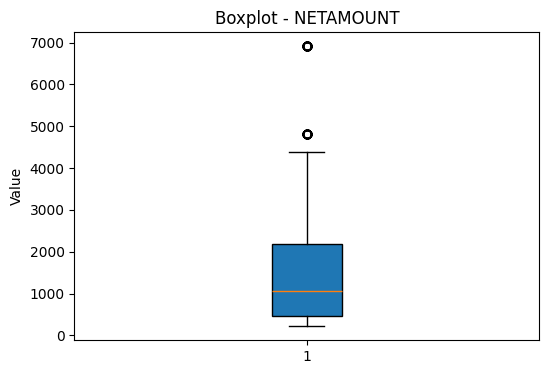

In [18]:
df = dataframes["SalesOrderItems"]
plt.figure(figsize=(6,4))
plt.boxplot(df["NETAMOUNT"].dropna(), vert=True, patch_artist=True)
plt.title("Boxplot - NETAMOUNT")
plt.ylabel("Value")
plt.show()



📦 Addresses — colunas analisadas: BUILDING, LONGITUDE, LATITUDE, ADDRESSTYPE


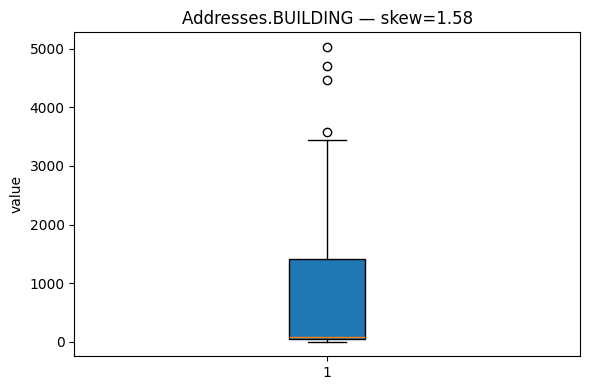

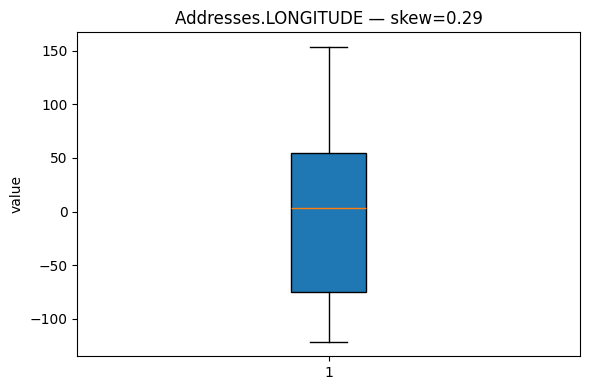

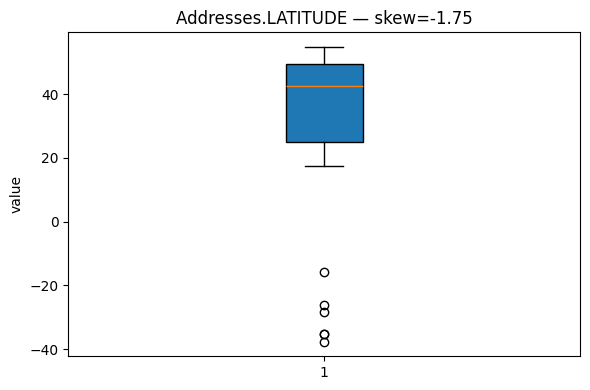

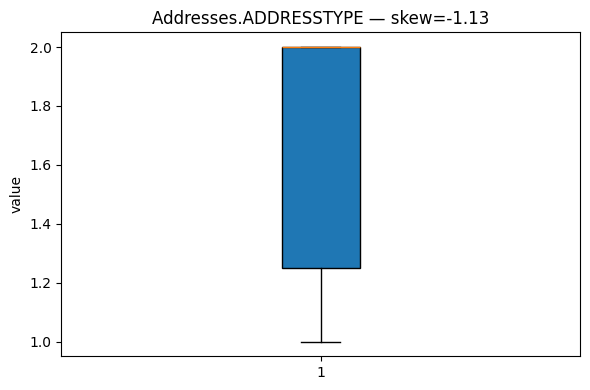


📦 BusinessPartners — colunas analisadas: PHONENUMBER, CREATEDBY, CHANGEDBY, PARTNERROLE


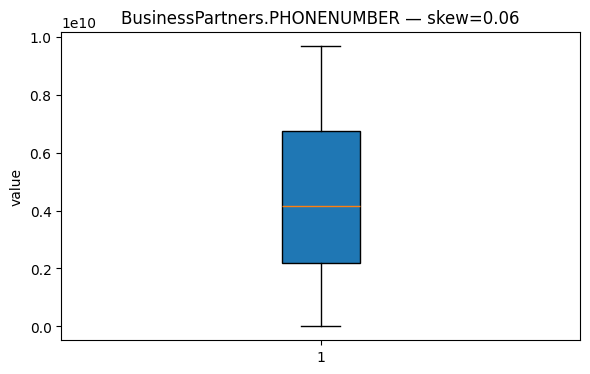

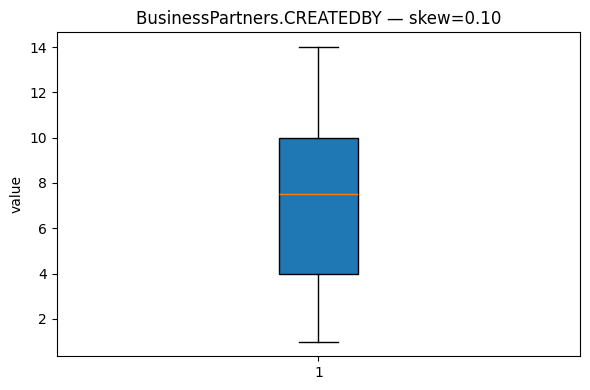

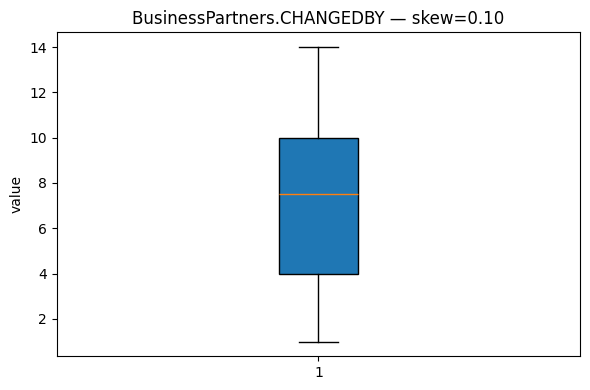

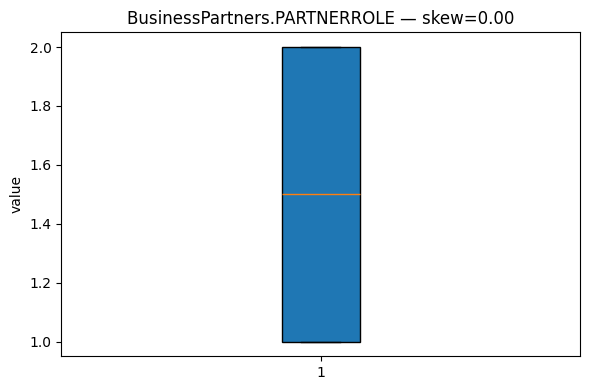

⚠️ Employees: nenhuma coluna numérica relevante encontrada (ou só IDs/datas).

📦 ProductCategories — colunas analisadas: CREATEDBY


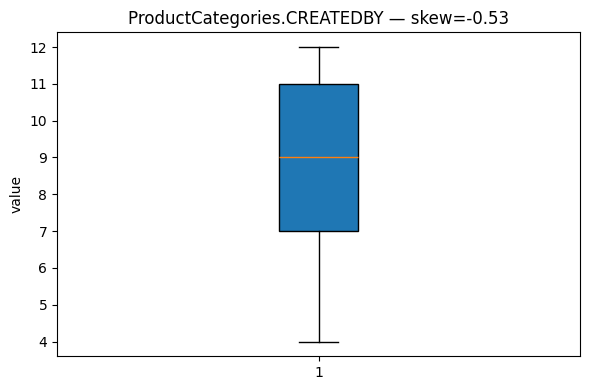

⚠️ ProductCategoryText: nenhuma coluna numérica relevante encontrada (ou só IDs/datas).

📦 Products — colunas analisadas: PRICE, WEIGHTMEASURE, CREATEDBY, CHANGEDBY


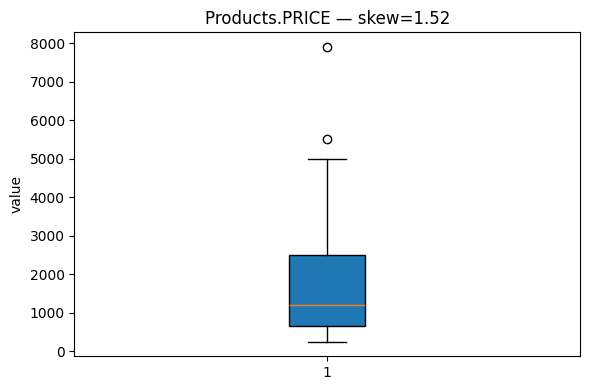

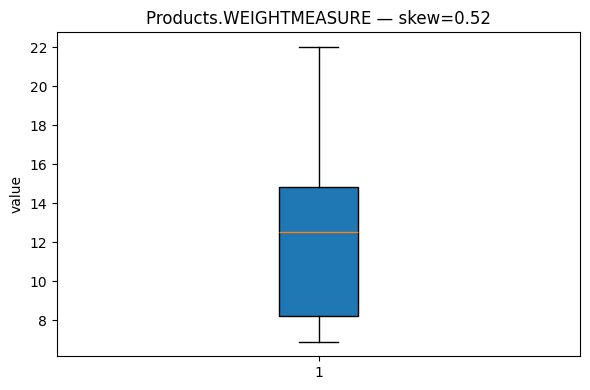

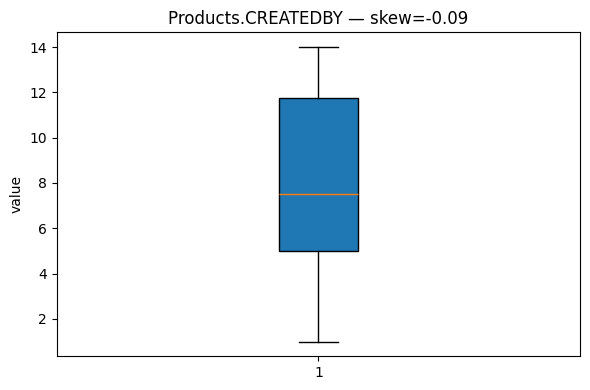

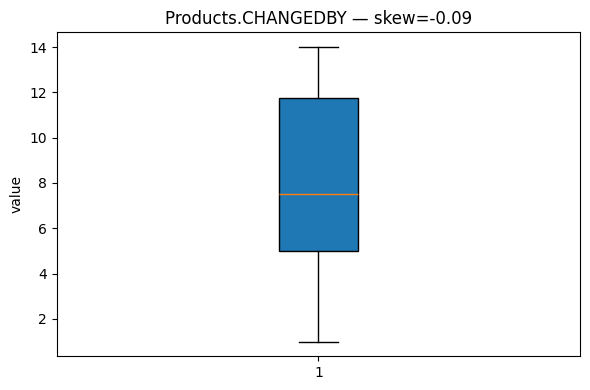

⚠️ ProductTexts: nenhuma coluna numérica relevante encontrada (ou só IDs/datas).

📦 SalesOrderItems — colunas analisadas: GROSSAMOUNT, NETAMOUNT, TAXAMOUNT, QUANTITY, SALESORDERITEM


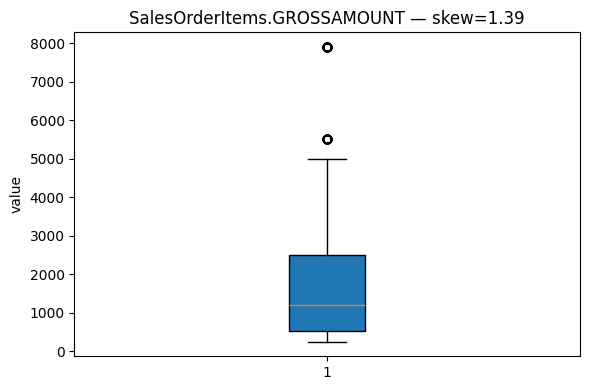

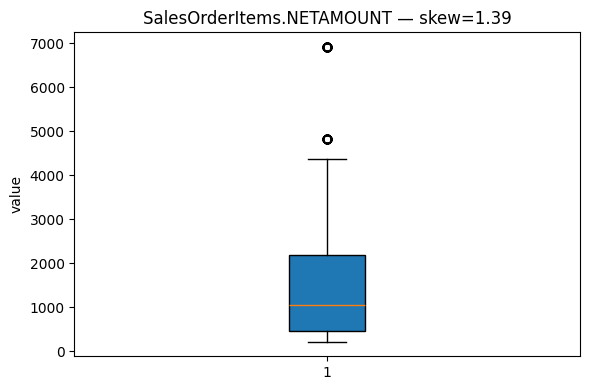

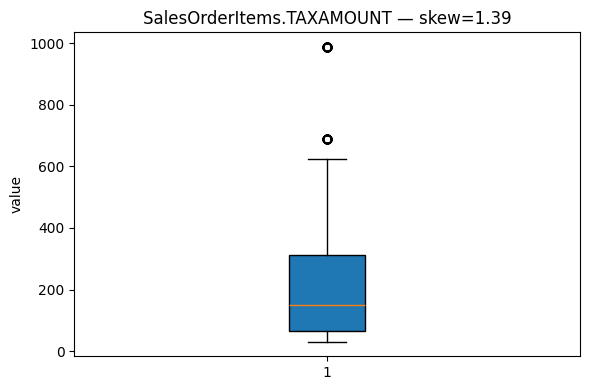

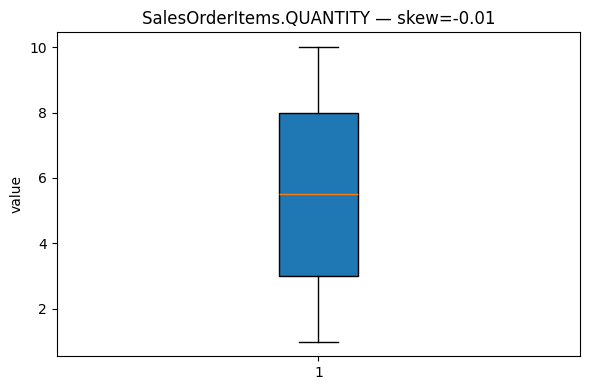

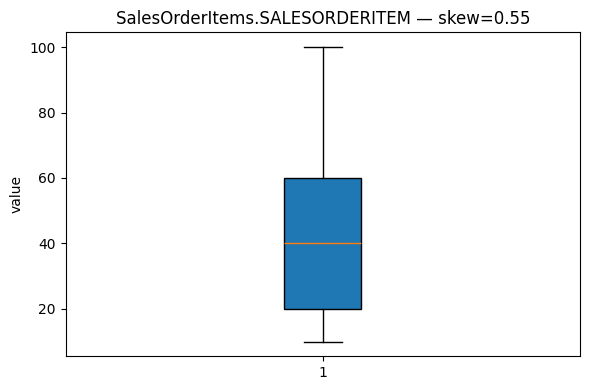


📦 SalesOrders — colunas analisadas: GROSSAMOUNT, NETAMOUNT, TAXAMOUNT, CHANGEDAT, FISCALYEARPERIOD, CREATEDBY


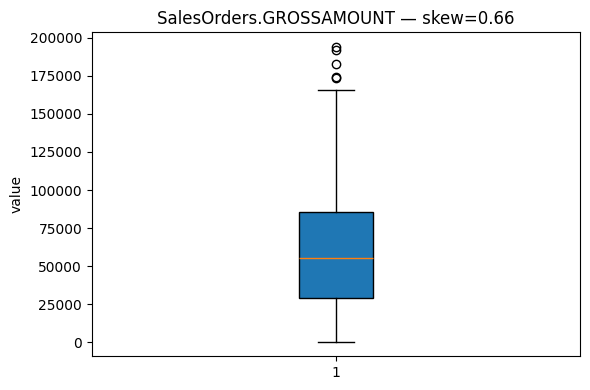

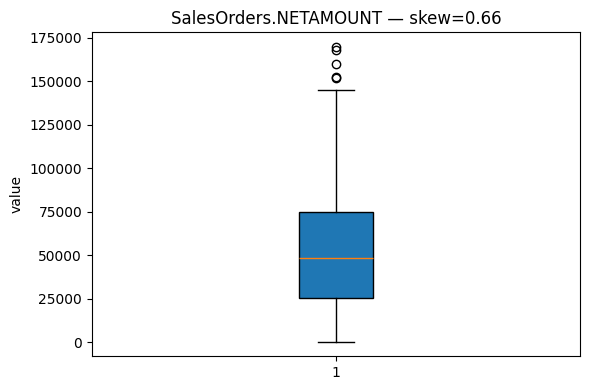

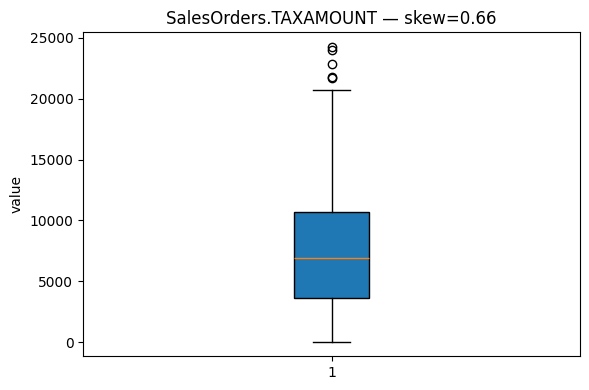

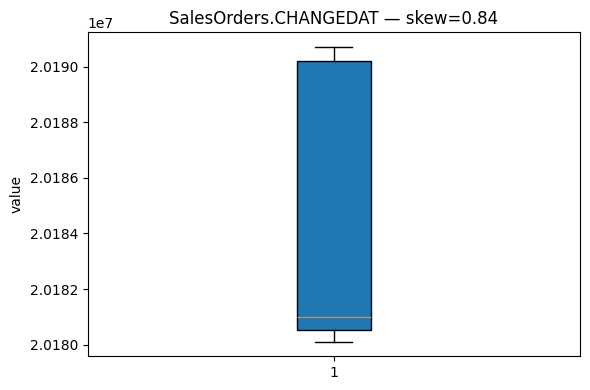

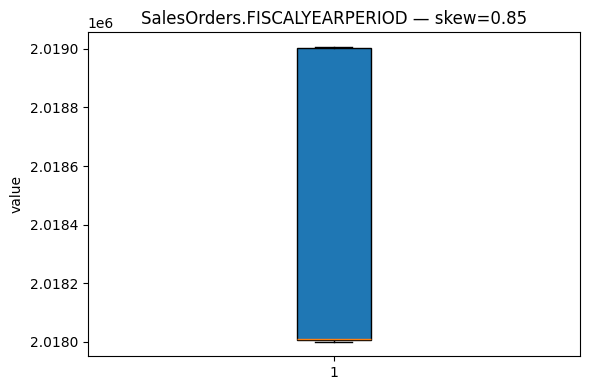

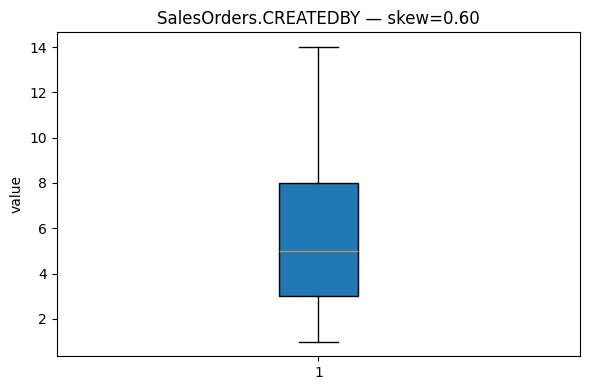

In [21]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Ajuste aqui se quiser mais/menos gráficos por dataframe
TOP_N = 6

# Palavras-chave que definem "colunas importantes" por negócio
PRIORITY_KEYWORDS = [
    "netamount", "grossamount", "taxamount", "freight", "discount",
    "quantity", "unitprice", "price", "weight", "cost", "margin", "revenue"
]

# Padrões para excluir IDs e datas
EXCLUDE_PATTERNS = [
    r"id$", r"_id$", r"^id$", r"orderid", r"itemid", r"partnerid", r"productid",
    r"employeeid", r"date", r"createdat", r"updatedat"
]

def is_excluded(col: str) -> bool:
    c = col.lower()
    return any(re.search(p, c) for p in EXCLUDE_PATTERNS)

def priority_score(col: str) -> int:
    c = col.lower()
    score = 0
    for kw in PRIORITY_KEYWORDS:
        if kw in c:
            score += 10  # cada palavra-chave encontrada soma 10
    return score

def pick_important_numeric_cols(df, top_n=TOP_N):
    # numéricas
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    # remove colunas vazias ou constantes
    num_cols = [c for c in num_cols if df[c].notna().sum() > 0 and df[c].nunique(dropna=True) > 1]
    # excluir IDs e datas
    num_cols = [c for c in num_cols if not is_excluded(c)]
    if not num_cols:
        return []

    # ranking 1: prioridade semântica
    sem_rank = {c: priority_score(c) for c in num_cols}
    # ranking 2: variância (para empatar / complementar)
    var_rank = {c: float(np.nanvar(df[c].astype(float))) for c in num_cols}

    # score final ponderado
    final = sorted(
        num_cols,
        key=lambda c: (sem_rank[c], var_rank[c]),
        reverse=True
    )
    return final[:min(top_n, len(final))]

def safe_boxplot(series, title):
    s = series.dropna().astype(float)
    if len(s) == 0:
        print(f"(sem dados) {title}")
        return
    # detectar skew para decidir log
    skew = s.skew()
    use_log = skew is not None and np.isfinite(skew) and skew > 2

    plt.figure(figsize=(6, 4))
    if use_log:
        # evitar log(0)
        s_pos = s[s > 0]
        if len(s_pos) > 0:
            plt.boxplot(np.log1p(s_pos), vert=True, patch_artist=True)
            plt.title(f"{title} (log1p) — skew={skew:.2f}")
            plt.ylabel("log1p(value)")
        else:
            # fallback se não há positivos
            plt.boxplot(s, vert=True, patch_artist=True)
            plt.title(f"{title} — skew={skew:.2f}")
            plt.ylabel("value")
    else:
        plt.boxplot(s, vert=True, patch_artist=True)
        plt.title(f"{title} — skew={skew:.2f}")
        plt.ylabel("value")
    plt.tight_layout()
    plt.show()

# Loop principal: um boxplot por coluna importante em cada dataframe
for name, df in dataframes.items():
    cols = pick_important_numeric_cols(df)
    if not cols:
        print(f"⚠️ {name}: nenhuma coluna numérica relevante encontrada (ou só IDs/datas).")
        continue

    print(f"\n📦 {name} — colunas analisadas: {', '.join(cols)}")
    for c in cols:
        safe_boxplot(df[c], title=f"{name}.{c}")


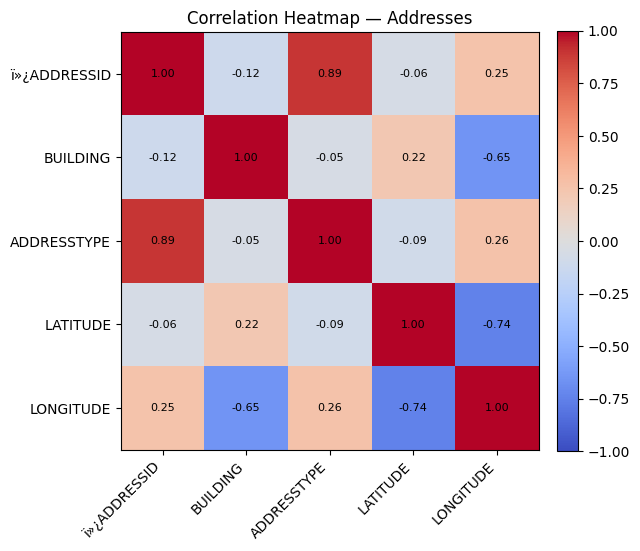

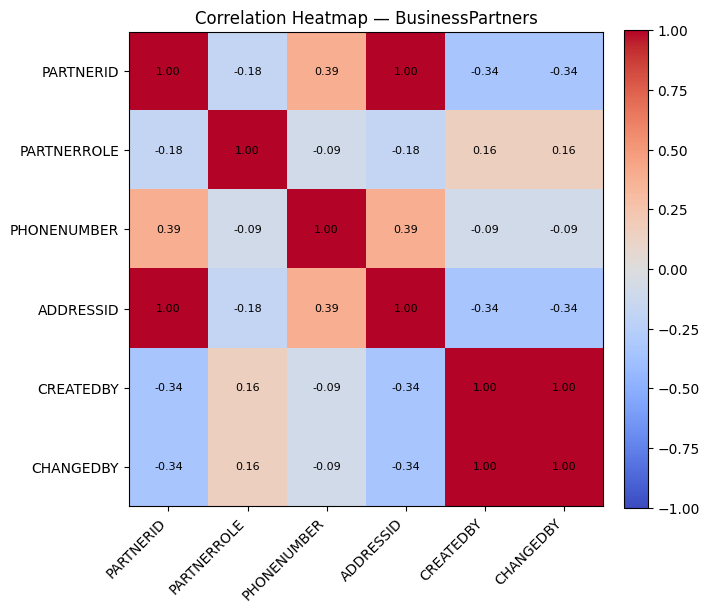

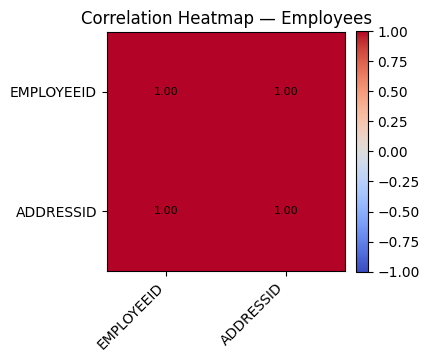

⚠️ ProductCategories: menos de 2 colunas numéricas úteis, pulando...
⚠️ ProductCategoryText: menos de 2 colunas numéricas úteis, pulando...


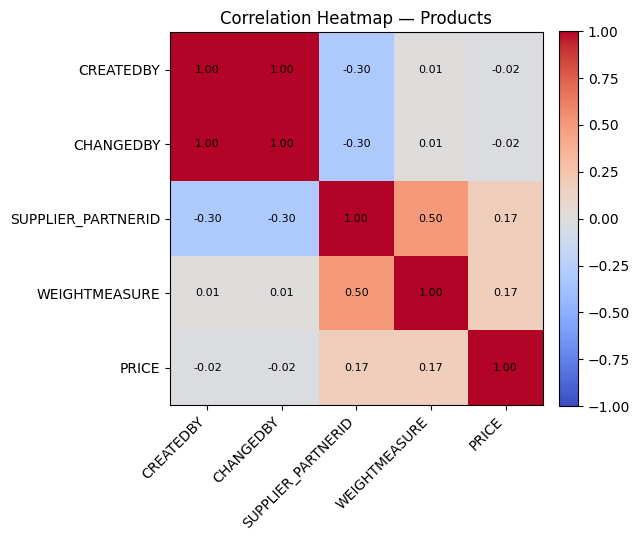

⚠️ ProductTexts: menos de 2 colunas numéricas úteis, pulando...


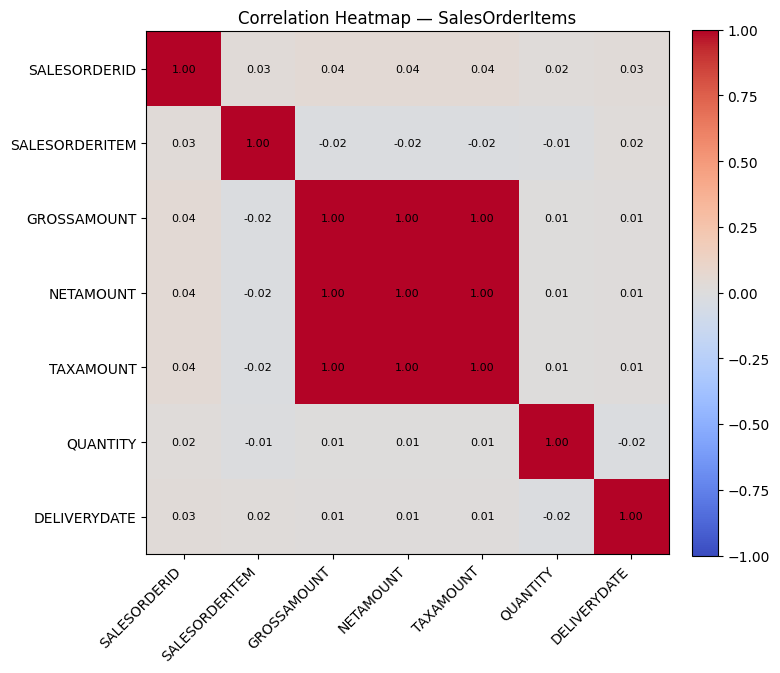

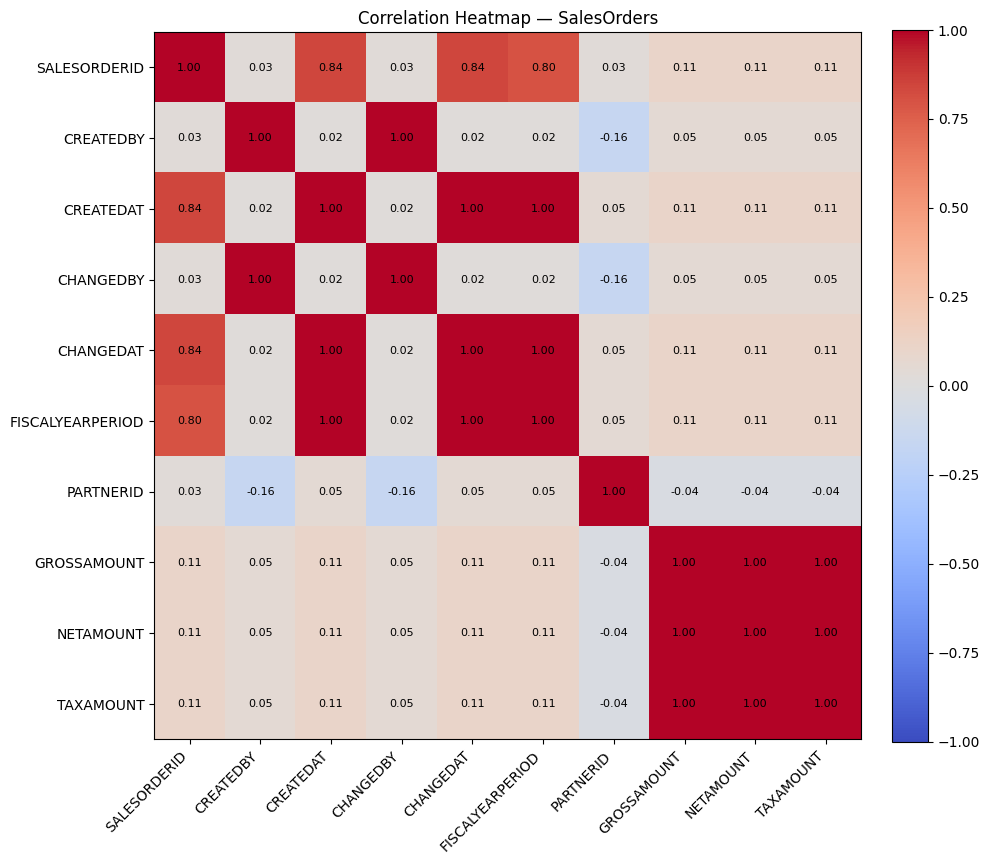

In [23]:
import matplotlib.pyplot as plt
import numpy as np

for name, df in dataframes.items():
    # Selecionar colunas numéricas úteis
    num_cols = df.select_dtypes(include=[np.number]).columns
    num_cols = [c for c in num_cols if df[c].nunique() > 1]
    
    if len(num_cols) < 2:
        print(f"⚠️ {name}: menos de 2 colunas numéricas úteis, pulando...")
        continue
    
    corr = df[num_cols].corr(numeric_only=True)

    plt.figure(figsize=(len(num_cols)*0.7+3, len(num_cols)*0.7+3))
    im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)

    # Barra de cor
    plt.colorbar(im, fraction=0.046, pad=0.04)

    # Eixos
    plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title(f"Correlation Heatmap — {name}")

    # Anotações (os números dentro dos quadrados)
    for i in range(len(num_cols)):
        for j in range(len(num_cols)):
            plt.text(
                j, i, f"{corr.iloc[i,j]:.2f}",
                ha="center", va="center", color="black", fontsize=8
            )

    plt.tight_layout()
    plt.show()
